In [1]:
import pandas as pd
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

from pathlib import Path

# How does change in insulin price compare to change in GDP? 

### Insulin Price Changes 2009 - 2023

In [2]:
FRED_PPIC_Diabetes_path = Path("Datasets/FRED_PPIC_Diabetes.csv")
FRED_PPIC_Diabetes_data = pd.read_csv(FRED_PPIC_Diabetes_path)

In [3]:
FRED_PPIC_Diabetes_data

,DATE,WPU06380103
0,2009-12-01,100.000
1,2010-01-01,99.800
2,2010-02-01,102.400
3,2010-03-01,103.000
4,2010-04-01,103.000
...,...,...
158,2023-02-01,315.576
159,2023-03-01,315.579
160,2023-04-01,315.579
161,2023-05-01,315.598


In [4]:
#just fyi
data_count = len(FRED_PPIC_Diabetes_data)
data_count

163

In [5]:
#converting to date/time in order to convert to year in next cell
FRED_PPIC_Diabetes_data["DATE"] = pd.to_datetime(FRED_PPIC_Diabetes_data["DATE"])
FRED_PPIC_Diabetes_data.info()
FRED_PPIC_Diabetes_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         163 non-null    datetime64[ns]
 1   WPU06380103  163 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


,DATE,WPU06380103
0,2009-12-01,100.000
1,2010-01-01,99.800
2,2010-02-01,102.400
3,2010-03-01,103.000
4,2010-04-01,103.000
...,...,...
158,2023-02-01,315.576
159,2023-03-01,315.579
160,2023-04-01,315.579
161,2023-05-01,315.598


In [6]:
#changing the dates into just the year so we can make computations later
FRED_PPIC_Diabetes_data["DATE"] = FRED_PPIC_Diabetes_data["DATE"].dt.year
FRED_PPIC_Diabetes_data

,DATE,WPU06380103
0,2009,100.000
1,2010,99.800
2,2010,102.400
3,2010,103.000
4,2010,103.000
...,...,...
158,2023,315.576
159,2023,315.579
160,2023,315.579
161,2023,315.598


In [7]:
#grouping by year 
year_group = FRED_PPIC_Diabetes_data.groupby("DATE")
year_group.groups

{2009: [0], 2010: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 2011: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 2012: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 2013: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48], 2014: [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 2015: [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], 2016: [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], 2017: [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], 2018: [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108], 2019: [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], 2020: [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132], 2021: [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144], 2022: [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156], 2023: [157, 158, 159, 160, 161, 162]}

In [8]:
#getting summary statistics table
year_group_stats = year_group.agg({"WPU06380103": ["mean", "median", "var", "std", "sem"]})
year_group_stats

WPU06380103                                         
            mean    median        var       std       sem
DATE                                                     
2009  100.000000  100.0000        NaN       NaN       NaN
2010  105.083333  104.0500  10.717879  3.273817  0.945070
2011  117.208333  117.1000  15.689924  3.961051  1.143457
2012  131.700000  128.9500  14.470909  3.804065  1.098139
2013  151.150000  149.9000  28.204545  5.310795  1.533095
2014  181.416667  185.3000  97.068788  9.852349  2.844128
2015  212.875000  218.4000  93.152955  9.651578  2.786171
2016  236.841667  230.3000  65.357197  8.084380  2.333759
2017  254.191667  257.8500  34.506288  5.874205  1.695737
2018  270.050000  270.3000   0.204545  0.452267  0.130558
2019  279.650000  279.4000   0.204545  0.452267  0.130558
2020  289.350000  289.3500   0.613636  0.783349  0.226134
2021  298.961500  298.8020   0.083959  0.289757  0.083646
2022  307.375500  307.3755   0.234362  0.484110  0.139751
2023  315.584333  315.5790   0.000114  0.010671  0.004356

In [9]:
average_price_per_year = year_group["WPU06380103"].mean()
average_price_per_year

DATE
2009    100.000000
2010    105.083333
2011    117.208333
2012    131.700000
2013    151.150000
2014    181.416667
2015    212.875000
2016    236.841667
2017    254.191667
2018    270.050000
2019    279.650000
2020    289.350000
2021    298.961500
2022    307.375500
2023    315.584333
Name: WPU06380103, dtype: float64

<Axes: xlabel='Year', ylabel='Mean Price of Insulin/Antidiabetes Products'>

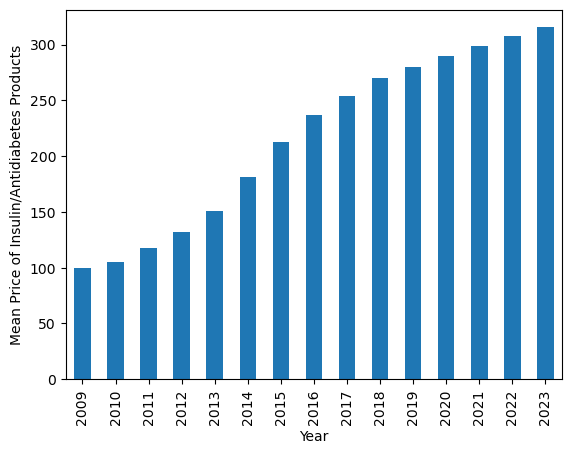

In [10]:
#bar plot
average_price_per_year.plot(kind="bar", xlabel = "Year", ylabel = "Mean Price of Insulin/Antidiabetes Products")

(0.0, 400.0)

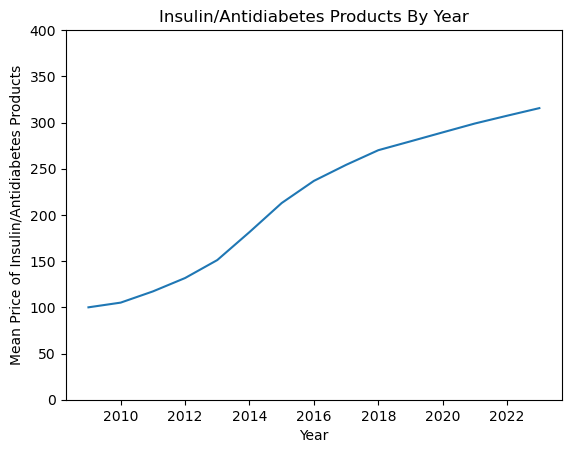

In [11]:
#line plot better shows over time 
average_price_per_year.plot(xlabel = "Year", ylabel = "Mean Price of Insulin/Antidiabetes Products", title= "Insulin/Antidiabetes Products By Year")
plt.ylim(0,400)

### GDP Per Capita

In [12]:
OWID_diabetes_vs_gdp_path = Path("Datasets/OWID_diabetes-prevalence-vs-gdp-per-capita.csv")
OWID_diabetes_vs_gdp_data = pd.read_csv(OWID_diabetes_vs_gdp_path)

In [13]:
OWID_diabetes_vs_gdp_data.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2011,7.6,1961.0963,29249156.0,NaN
2,Afghanistan,AFG,2021,10.9,1516.3057,40099460.0,NaN
3,Afghanistan,AFG,2002,NaN,1280.4631,21000258.0,NaN
4,Afghanistan,AFG,2003,NaN,1292.3335,22645136.0,NaN


In [14]:
usa_data = OWID_diabetes_vs_gdp_data.loc[OWID_diabetes_vs_gdp_data["Entity"] == "United States",:]
usa_data

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
54947,United States,USA,2011,9.4,54960.906,313876608.0,NaN
54948,United States,USA,2021,10.7,63669.710,336997632.0,NaN
54949,United States,USA,1990,NaN,40456.242,248083728.0,NaN
54950,United States,USA,1991,NaN,39876.016,251560192.0,NaN
54951,United States,USA,1992,NaN,40712.062,255175328.0,NaN
...,...,...,...,...,...,...,...
55201,United States,USA,1985,NaN,NaN,235146176.0,NaN
55202,United States,USA,1986,NaN,NaN,237512784.0,NaN
55203,United States,USA,1987,NaN,NaN,239853168.0,NaN
55204,United States,USA,1988,NaN,NaN,242287808.0,NaN


In [15]:
#putting only information pertinent to our question
reduced_usa = usa_data[["Entity","Year","GDP per capita, PPP (constant 2017 international $)"]]
reduced_usa

,Entity,Year,"GDP per capita, PPP (constant 2017 international $)"
54947,United States,2011,54960.906
54948,United States,2021,63669.710
54949,United States,1990,40456.242
54950,United States,1991,39876.016
54951,United States,1992,40712.062
...,...,...,...
55201,United States,1985,NaN
55202,United States,1986,NaN
55203,United States,1987,NaN
55204,United States,1988,NaN


In [16]:
# Drop all rows with missing information
reduced_more_usa = reduced_usa.dropna(how='any')
reduced_more_usa

,Entity,Year,"GDP per capita, PPP (constant 2017 international $)"
54947,United States,2011,54960.906
54948,United States,2021,63669.710
54949,United States,1990,40456.242
54950,United States,1991,39876.016
54951,United States,1992,40712.062
54952,United States,1993,41284.355
54953,United States,1994,42424.168
54954,United States,1995,43047.260
54955,United States,1996,44154.547
54956,United States,1997,45566.260


In [17]:
# del reduced_more_usa["Entity"] 
# reduced_more_usa
cleaned_usa = reduced_more_usa[["Year","GDP per capita, PPP (constant 2017 international $)"]]

In [18]:
#putting into ascending order
cleaned_plot = cleaned_usa.set_index("Year").sort_index() #ascending by default
cleaned_plot

,"GDP per capita, PPP (constant 2017 international $)"
Year,
1990,40456.242
1991,39876.016
1992,40712.062
1993,41284.355
1994,42424.168
1995,43047.260
1996,44154.547
1997,45566.260
1998,47056.510


<Axes: xlabel='Year', ylabel='GDP per capita, PPP (constant 2017 international $)'>

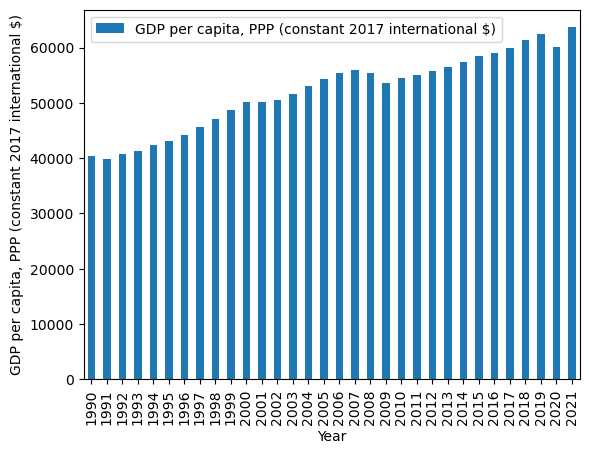

In [19]:
#bar plot
cleaned_plot.plot(kind="bar", xlabel = "Year", ylabel = "GDP per capita, PPP (constant 2017 international $)")

In [20]:
cleaned_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1990 to 2021
Data columns (total 1 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDP per capita, PPP (constant 2017 international $)  32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


<Axes: xlabel='Year', ylabel='GDP per capita, PPP (constant 2017 international $)'>

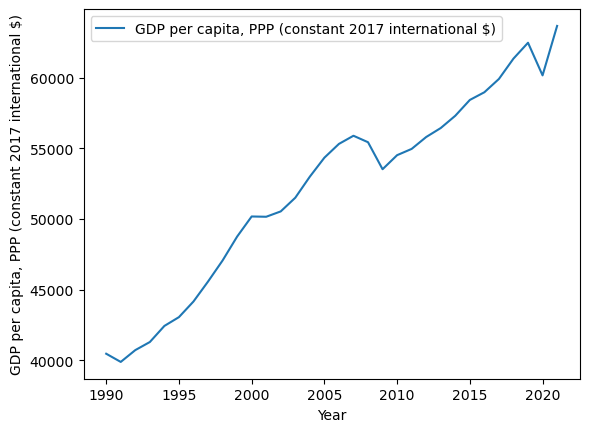

In [21]:
#line plot
cleaned_plot.plot(xlabel = "Year", ylabel = "GDP per capita, PPP (constant 2017 international $)")

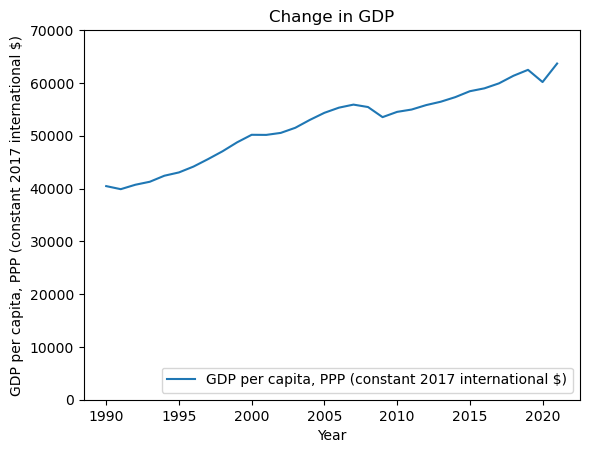

In [22]:
#industry standard to start graphs from 0 so not to seem manipulative 
cleaned_plot.plot(xlabel = "Year", ylabel = "GDP per capita, PPP (constant 2017 international $)", title = "Change in GDP")
plt.ylim(0,70000)
plt.legend(loc="lower right")

### GDP vs Insulin Price

In [24]:
combined_df = cleaned_plot.merge(average_price_per_year,how="inner", right_index = True, left_index = True )
combined_df

,"GDP per capita, PPP (constant 2017 international $)",WPU06380103
2009,53521.207,100.000000
2010,54516.855,105.083333
2011,54960.906,117.208333
2012,55803.510,131.700000
2013,56438.945,151.150000
2014,57308.320,181.416667
2015,58427.550,212.875000
2016,58972.902,236.841667
2017,59914.777,254.191667
2018,61355.650,270.050000


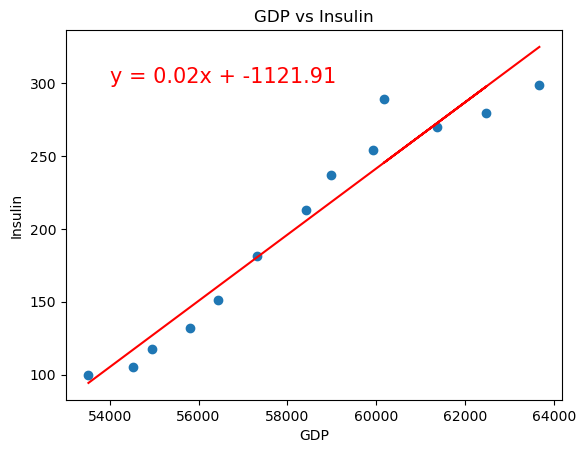

PearsonRResult(statistic=0.9685644064154566, pvalue=5.4540586934073595e-08).


In [25]:
# Define a function to create Linear Regression plots
x_values = combined_df["GDP per capita, PPP (constant 2017 international $)"]
y_values = combined_df["WPU06380103"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress,"r-")
plt.annotate(line_eq, (54000,300), fontsize=15, color="red")
plt.xlabel('GDP') #independent
plt.ylabel("Insulin") #dependent
plt.title("GDP vs Insulin")
plt.show()
correlation = pearsonr(x_values, y_values) #directly imported on cell 1 so does not need st. 
print(f"{correlation}.")

In [26]:
combined_df.reset_index().corr()

,index,"GDP per capita, PPP (constant 2017 international $)",WPU06380103
index,1.000000,0.973001,0.987841
"GDP per capita, PPP (constant 2017 international $)",0.973001,1.000000,0.968564
WPU06380103,0.987841,0.968564,1.000000


### Analysis

* As GDP per capita increases, the price of insulin increases. There is a strong, positive correlation meaning insulin prices rise when GDP increases and this not due to random chance. Our analysis shows there is a strong relationship, however, it is to be considered there might be a third variable that influences both GDP and insulin price like time/inflation, war, demand, covid, etc. 